@ This notebook was written by The Cuong

<center> 
    <h2>PHÂN LOẠI UNG THƯ TRONG BÀI TOÁN DỰ ĐOÁN UNG THƯ SỬ DỤNG CÁC THUẬT TOÁN PHÂN CỤM<h2>
<center>

Trước tiên, ta import các thư viện cần thiết

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cv2
from sklearn.neighbors import NearestNeighbors

Cell dưới đây thực hiện việc tải dữ liệu. Dữ liệu gồm 28 ảnh ung thư miệng từ trang web

In [3]:
folder_path = "Data\Testing Data set"
images = []
for filename in os.listdir(folder_path):
    if filename.endswith('.webp') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        image = image.reshape(-1)
        images.append(image)

<h3>1. Cơ sở lý thuyết thuật toán phân cụm DBSCAN<h3>

Trước tiên, chúng ta sẽ tìm tham số ```eps``` bằng thuật toán KNN

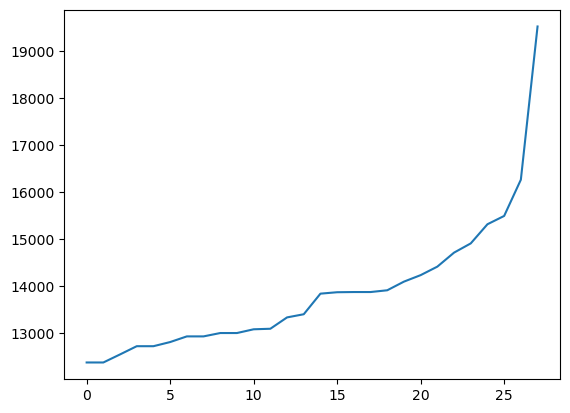

In [4]:
k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(images)
distances, indices = nbrs.kneighbors(images)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

Ta có thể thấy đường gấp khúc mạnh ở khoảng cách 15000 - 16000. 

In [5]:
dbscan = DBSCAN(eps=15314.56052259, min_samples=7)
dbscan.fit(images)
dbscan.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

Như vậy thuật toán DBSCAN trong trường hợp bộ dữ liệu này đã tìm ra các điểm nhiễu với nhãn là -1. Như vậy, với bộ dữ liệu này, ta có thể loại bỏ các điểm nhiễu.

In [3]:
g1 = np.array((1,2,3,4,5))
g2 = np.array((100, 200, 300, 400, 500))
g3 = np.array((5,4,3,2,1))

In [ ]:
from scipy import 